## Cloning the repository for trained model

In [1]:
!git clone https://github.com/arunponnusamy/gender-detection-keras

fatal: destination path 'gender-detection-keras' already exists and is not an empty directory.


In [2]:
cd gender-detection-keras/

C:\Users\mayan\gender-detection-keras


# Installing the required libraries

In [3]:
!pip install -r requirements.txt

ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'C:\\Users\\mayan\\anaconda3\\envs\\tensorflow_env\\Lib\\site-packages\\cv2\\cv2.cp37-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



  Using cached tensorboard-2.2.2-py3-none-any.whl (3.0 MB)
  Using cached gast-0.3.3-py2.py3-none-any.whl (9.7 kB)
  Using cached tensorflow_estimator-2.2.0-py2.py3-none-any.whl (454 kB)
  Using cached scipy-1.4.1-cp37-cp37m-win_amd64.whl (30.9 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)


In [4]:
!pip install scikit-learn matplotlib

In [8]:
# import necessary packages
from keras.preprocessing.image import img_to_array
from keras.models import load_model
from keras.utils import get_file
import numpy as np
import argparse
import cv2
import os
import cvlib as cv
from matplotlib.pyplot import imshow
%matplotlib inline

## Trained model can be found at the following path 
#dwnld_link = "https://github.com/arunponnusamy/cvlib/releases/download/v0.2.0/gender_detection.model"

In [15]:
model_path = 'C:/Users/mayan/gender-detection-keras/model/gender_detection.model'
## read input image
image = cv2.imread('C:/Users/mayan/Desktop/1TouchSolutions/Gender detection/Test1.jpg')

if image is None:
    print("Could not read input image")
    exit()

# load pre-trained model
model = load_model(model_path)

# detect faces in the image
face, confidence = cv.detect_face(image)

classes = ['man','woman']

# loop through detected faces
for idx, f in enumerate(face):

     # get corner points of face rectangle       
    (startX, startY) = f[0], f[1]
    (endX, endY) = f[2], f[3]

    # draw rectangle over face
    cv2.rectangle(image, (startX,startY), (endX,endY), (0,255,0), 2)

    # crop the detected face region
    face_crop = np.copy(image[startY:endY,startX:endX])

    # preprocessing for gender detection model
    face_crop = cv2.resize(face_crop, (96,96))
    face_crop = face_crop.astype("float") / 255.0
    face_crop = img_to_array(face_crop)
    face_crop = np.expand_dims(face_crop, axis=0)

    # apply gender detection on face
    conf = model.predict(face_crop)[0]
    print(conf)
    print(classes)

    # get label with max accuracy
    idx = np.argmax(conf)
    label = classes[idx]

    label = "{}: {:.2f}%".format(label, conf[idx] * 100)

    Y = startY - 10 if startY - 10 > 10 else startY + 10

    # write label and confidence above face rectangle
    cv2.putText(image, label, (startX, Y),  cv2.FONT_HERSHEY_SIMPLEX,
                0.7, (0, 255, 0), 2)

# display output
cv2.imshow("gender detection", image)

# press any key to close window           
cv2.waitKey()

# save output
cv2.imwrite("gender_detection.jpg", image)

# release resources
cv2.destroyAllWindows()

[1. 0.]
['man', 'woman']
[0.25504464 0.72237283]
['man', 'woman']
[4.4680529e-04 9.9938583e-01]
['man', 'woman']
[0.9882434 0.0100464]
['man', 'woman']


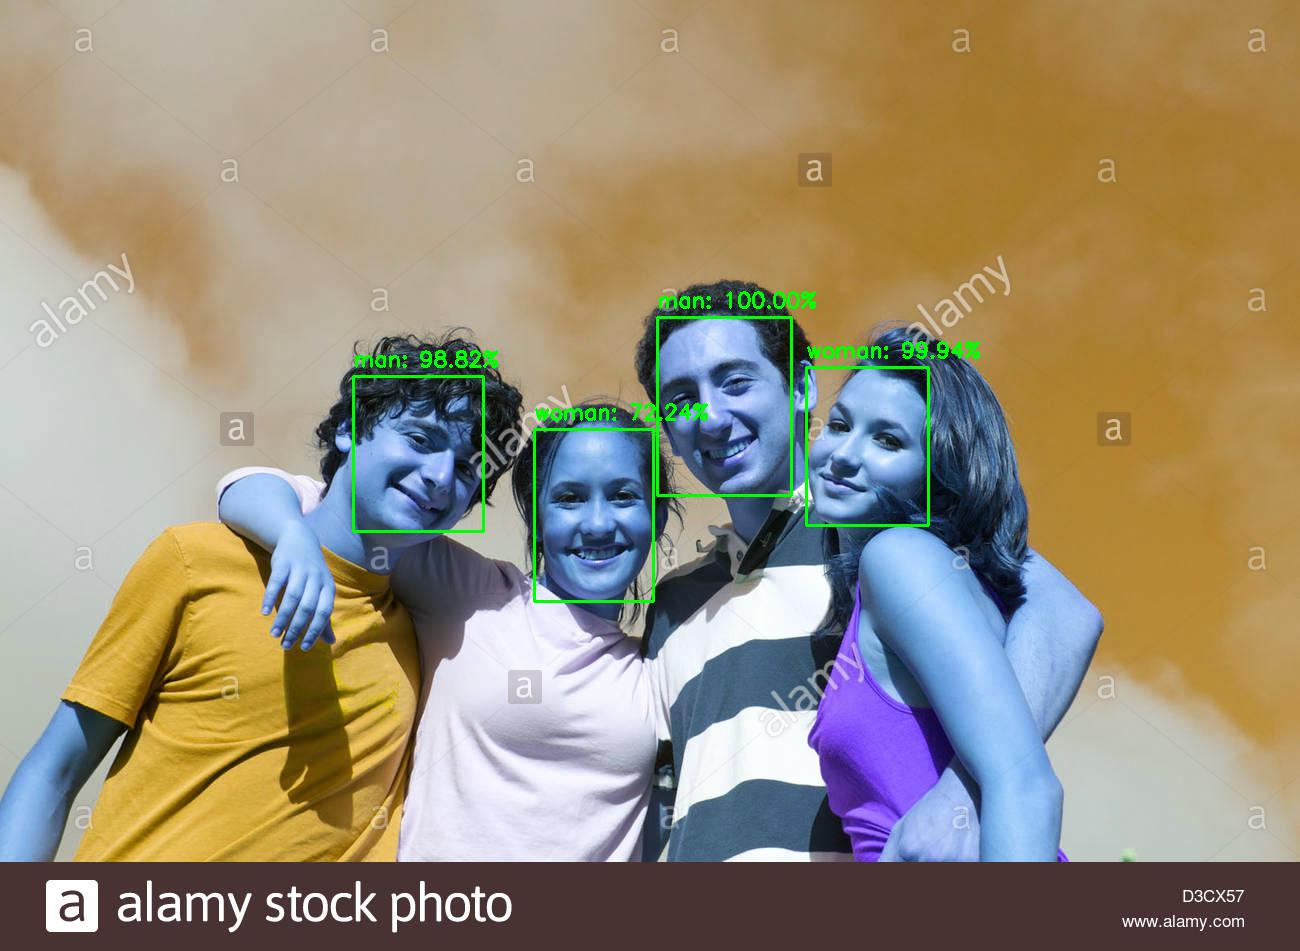

In [16]:
import io
import cv2
import numpy as np
from IPython.display import clear_output, Image, display
import PIL.Image

def showarray(a, fmt='jpeg'):
    a = np.uint8(np.clip(a, 0, 255))
    f = io.BytesIO()
    PIL.Image.fromarray(a).save(f, fmt)
    display(Image(data=f.getvalue()))
    
showarray(image,fmt='jpeg')

In [21]:
model_path = 'C:/Users/mayan/gender-detection-keras/model/gender_detection.model'
## read input image
image = cv2.imread('C:/Users/mayan/Desktop/1TouchSolutions/Gender detection/Test2.jpg')

if image is None:
    print("Could not read input image")
    exit()

# load pre-trained model
model = load_model(model_path)

# detect faces in the image
face, confidence = cv.detect_face(image)

classes = ['man','woman']

# loop through detected faces
for idx, f in enumerate(face):

     # get corner points of face rectangle       
    (startX, startY) = f[0], f[1]
    (endX, endY) = f[2], f[3]

    # draw rectangle over face
    cv2.rectangle(image, (startX,startY), (endX,endY), (0,255,0), 2)

    # crop the detected face region
    face_crop = np.copy(image[startY:endY,startX:endX])

    # preprocessing for gender detection model
    face_crop = cv2.resize(face_crop, (96,96))
    face_crop = face_crop.astype("float") / 255.0
    face_crop = img_to_array(face_crop)
    face_crop = np.expand_dims(face_crop, axis=0)

    # apply gender detection on face
    conf = model.predict(face_crop)[0]
    print(conf)
    print(classes)

    # get label with max accuracy
    idx = np.argmax(conf)
    label = classes[idx]

    label = "{}: {:.2f}%".format(label, conf[idx] * 100)

    Y = startY - 10 if startY - 10 > 10 else startY + 10

    # write label and confidence above face rectangle
    cv2.putText(image, label, (startX, Y),  cv2.FONT_HERSHEY_SIMPLEX,
                0.7, (0, 255, 0), 2)

# display output
cv2.imshow("gender detection", image)

# press any key to close window           
cv2.waitKey()

# save output
cv2.imwrite("gender_detection.jpg", image)

# release resources
cv2.destroyAllWindows()

[0.00593218 0.99394906]
['man', 'woman']
[0.0060769  0.99387676]
['man', 'woman']
[0.9726399  0.03363148]
['man', 'woman']
[0.9893134 0.0105633]
['man', 'woman']


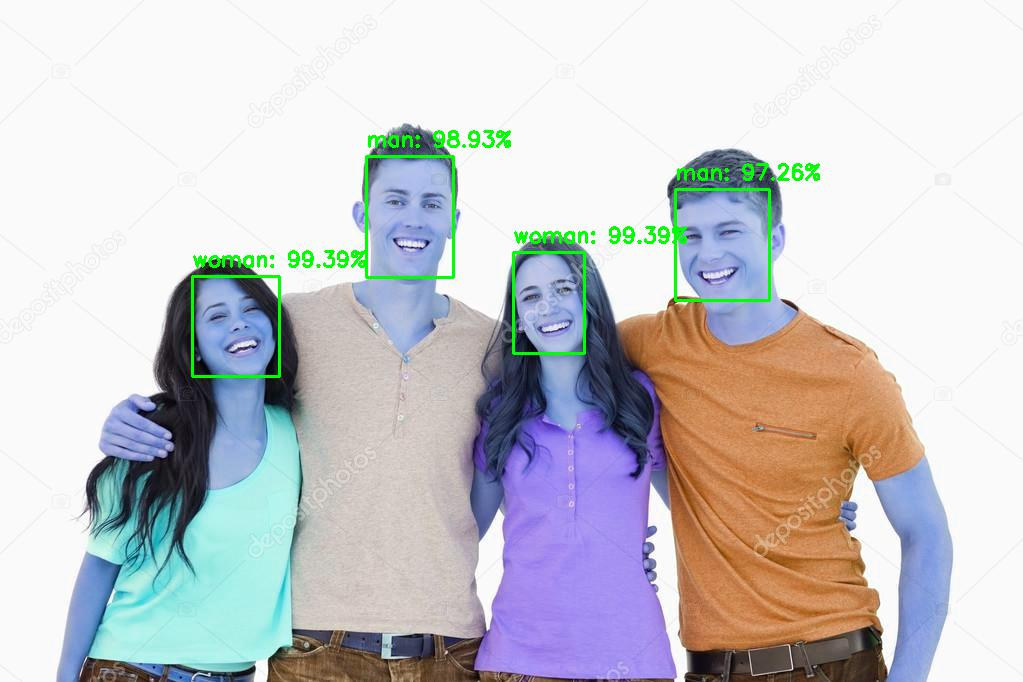

In [22]:
import io
import cv2
import numpy as np
from IPython.display import clear_output, Image, display
import PIL.Image

def showarray(a, fmt='jpeg'):
    a = np.uint8(np.clip(a, 0, 255))
    f = io.BytesIO()
    PIL.Image.fromarray(a).save(f, fmt)
    display(Image(data=f.getvalue()))
    
showarray(image,fmt='jpeg')

In [27]:
model_path = 'C:/Users/mayan/gender-detection-keras/model/gender_detection.model'
## read input image
image = cv2.imread('C:/Users/mayan/Desktop/1TouchSolutions/Gender detection/Test8.jpg')

if image is None:
    print("Could not read input image")
    exit()

# load pre-trained model
model = load_model(model_path)

# detect faces in the image
face, confidence = cv.detect_face(image)

classes = ['man','woman']

# loop through detected faces
for idx, f in enumerate(face):

     # get corner points of face rectangle       
    (startX, startY) = f[0], f[1]
    (endX, endY) = f[2], f[3]

    # draw rectangle over face
    cv2.rectangle(image, (startX,startY), (endX,endY), (0,255,0), 2)

    # crop the detected face region
    face_crop = np.copy(image[startY:endY,startX:endX])

    # preprocessing for gender detection model
    face_crop = cv2.resize(face_crop, (96,96))
    face_crop = face_crop.astype("float") / 255.0
    face_crop = img_to_array(face_crop)
    face_crop = np.expand_dims(face_crop, axis=0)

    # apply gender detection on face
    conf = model.predict(face_crop)[0]
    print(conf)
    print(classes)

    # get label with max accuracy
    idx = np.argmax(conf)
    label = classes[idx]

    label = "{}: {:.2f}%".format(label, conf[idx] * 100)

    Y = startY - 10 if startY - 10 > 10 else startY + 10

    # write label and confidence above face rectangle
    cv2.putText(image, label, (startX, Y),  cv2.FONT_HERSHEY_SIMPLEX,
                0.7, (0, 255, 0), 2)

# display output
cv2.imshow("gender detection", image)

# press any key to close window           
cv2.waitKey()

# save output
cv2.imwrite("gender_detection.jpg", image)

# release resources
cv2.destroyAllWindows()

[0.5974409 0.3872987]
['man', 'woman']
[0. 1.]
['man', 'woman']
[3.8863092e-07 9.9999940e-01]
['man', 'woman']
[0.80355936 0.19700603]
['man', 'woman']
[5.3211313e-08 9.9999988e-01]
['man', 'woman']
[2.9728139e-07 9.9999964e-01]
['man', 'woman']
[3.2477082e-08 1.0000000e+00]
['man', 'woman']


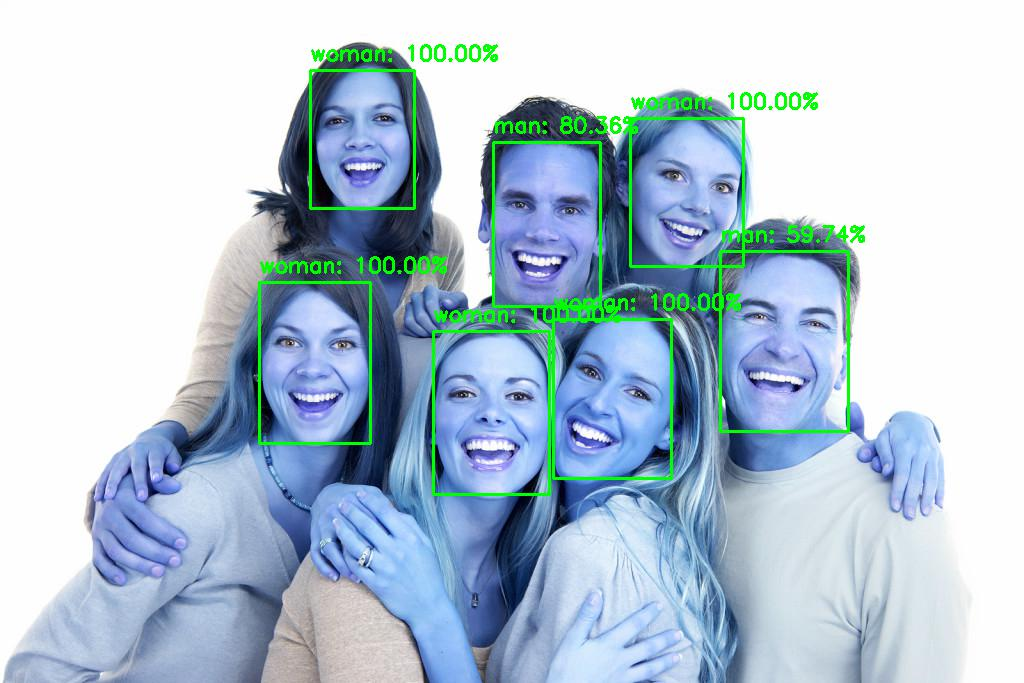

In [28]:
import io
import cv2
import numpy as np
from IPython.display import clear_output, Image, display
import PIL.Image

def showarray(a, fmt='jpeg'):
    a = np.uint8(np.clip(a, 0, 255))
    f = io.BytesIO()
    PIL.Image.fromarray(a).save(f, fmt)
    display(Image(data=f.getvalue()))
    
showarray(image,fmt='jpeg')